### **News Article Classification**  
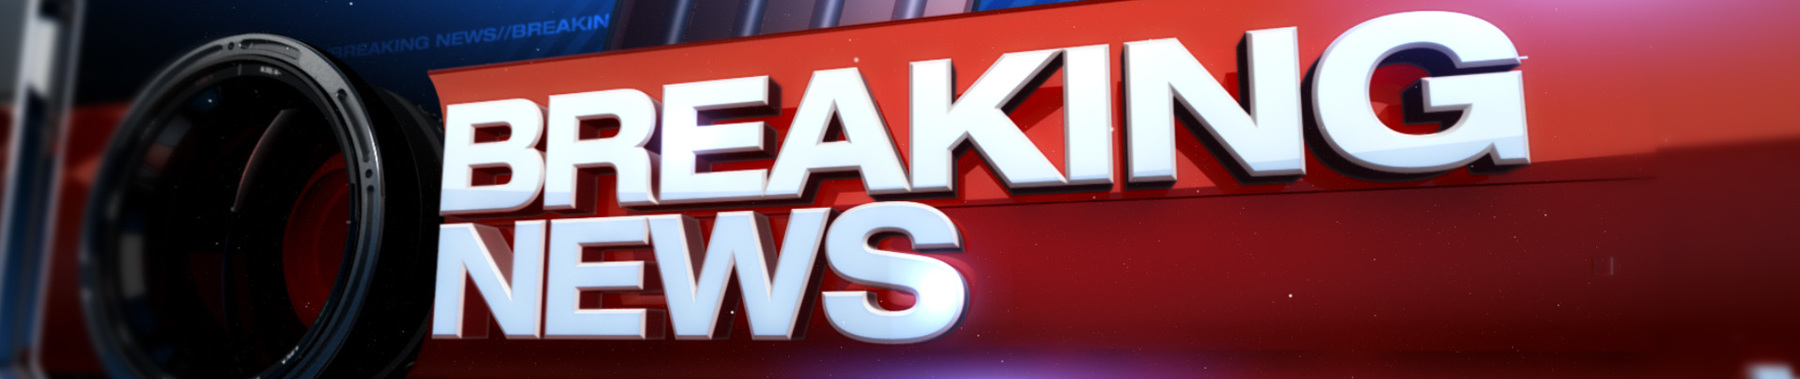

**1. Overview**  
In today’s digital world, news articles are constantly being generated and shared across
different platforms. For news organizations, social media platforms, and aggregators,
classifying articles into specific categories such as sports, politics, and technology can help
improve content management and recommendation systems. This project aims to develop a
machine learning model that can classify news articles into predefined categories, such as
sports, politics, and technology, based on their content.
By automating this process, organizations can efficiently categorize large volumes of news
articles, making it easier for readers to access relevant information based on their interests.

**2. Problem Statement**  
The primary objective of this project is to build a classification model that can automatically
categorize news articles into different predefined categories. The model will be trained using
a labeled dataset of news articles and will output the most likely category (e.g., sports,
politics, or technology) for any given article.  
The goal is to:  
- Develop a robust classifier capable of handling articles from multiple categories.
- Preprocess the text data, extract meaningful features, and train models to classify the articles.
- Evaluate the model performance and provide actionable insights on how well it classifies articles.

**3. Dataset Information**  
The dataset can be used from **[data_news](https://docs.google.com/spreadsheets/d/1m4YMfqQxo_DcbtzGqbfZitvJmytbWUE8qjixhHmtadk/edit?gid=1552269726#gid=1552269726)**.  

**4. Deliverables**  
**1. Data Collection and Preprocessing**
- Collect a dataset of labeled news articles (sports, politics, technology etc).
- Clean and preprocess the text data.
- Handle missing data, if any, and ensure the text is ready for feature extraction.

**2. Feature Extraction**
- Use methods like TF-IDF, word embeddings (e.g., Word2Vec), or
bag-of-words to convert text data into numerical features.
- Perform exploratory data analysis (EDA) to understand the distribution of different
categories.

**3. Model Development and Training**
- Build classification models using algorithms like Logistic Regression, Support Vector Machines (SVM).
- Train the models on the preprocessed text data, tuning hyperparameters as necessary.
- Use cross-validation to ensure robust evaluation of model performance.

**4. Model Evaluation**
- Evaluate the models using appropriate metrics.
- Compare the performance of different models and select the best one for classification.
- The model can successfully classify new, unseen news articles into the correct categories (sports, politics, technology).
---

In [22]:
# Import liabrary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import re
import nltk
import contractions
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')
from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('wordnet')
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
# Upload the dataset
url = 'https://docs.google.com/spreadsheets/d/1m4YMfqQxo_DcbtzGqbfZitvJmytbWUE8qjixhHmtadk/export?format=csv&gid=1552269726#'
df = pd.read_csv(url)
# Display the few rows of data
df.head(5)

,category,headline,links,short_description,keywords
0,WELLNESS,143 Miles in 35 Days: Lessons Learned,https://www.huffingtonpost.com/entry/running-l...,Resting is part of training. I've confirmed wh...,running-lessons
1,WELLNESS,Talking to Yourself: Crazy or Crazy Helpful?,https://www.huffingtonpost.com/entry/talking-t...,Think of talking to yourself as a tool to coac...,talking-to-yourself-crazy
2,WELLNESS,Crenezumab: Trial Will Gauge Whether Alzheimer...,https://www.huffingtonpost.com/entry/crenezuma...,The clock is ticking for the United States to ...,crenezumab-alzheimers-disease-drug
3,WELLNESS,"Oh, What a Difference She Made",https://www.huffingtonpost.com/entry/meaningfu...,"If you want to be busy, keep trying to be perf...",meaningful-life
4,WELLNESS,Green Superfoods,https://www.huffingtonpost.com/entry/green-sup...,"First, the bad news: Soda bread, corned beef a...",green-superfoods


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           50000 non-null  object
 1   headline           50000 non-null  object
 2   links              50000 non-null  object
 3   short_description  50000 non-null  object
 4   keywords           47332 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [4]:
df.describe(include='all')

,category,headline,links,short_description,keywords
count,50000,50000,50000,50000,47332
unique,10,45577,45745,45743,41558
top,WELLNESS,Sunday Roundup,https://www.huffingtonpost.com/entry/bryce-har...,"Along with his fists, the star Nationals outfi...",post
freq,5000,22,8,8,85


In [5]:
df['category'].value_counts()

,count
category,
WELLNESS,5000
POLITICS,5000
ENTERTAINMENT,5000
TRAVEL,5000
STYLE & BEAUTY,5000
PARENTING,5000
FOOD & DRINK,5000
WORLD NEWS,5000
BUSINESS,5000


In [6]:
# Combine relevant text fields
df['text'] = df['headline']+' '+df['short_description']
df['text'][1]

'Talking to Yourself: Crazy or Crazy Helpful? Think of talking to yourself as a tool to coach yourself through a challenge, or to narrate your own experiences to yourself. In any case, treat yourself with respect and you just may find you enjoy your own company.'

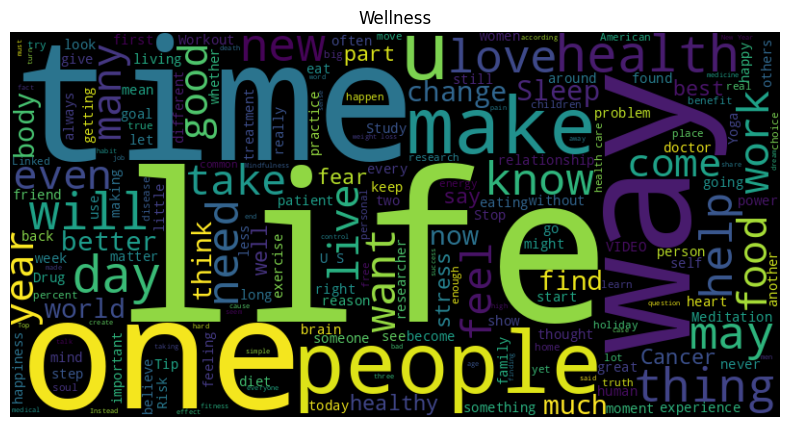

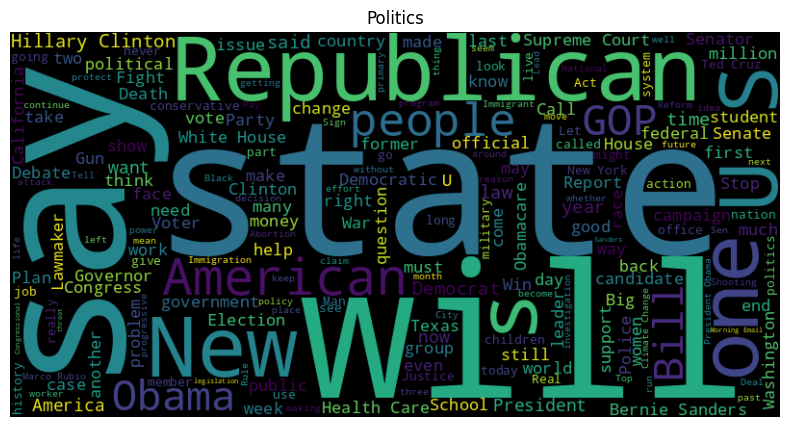

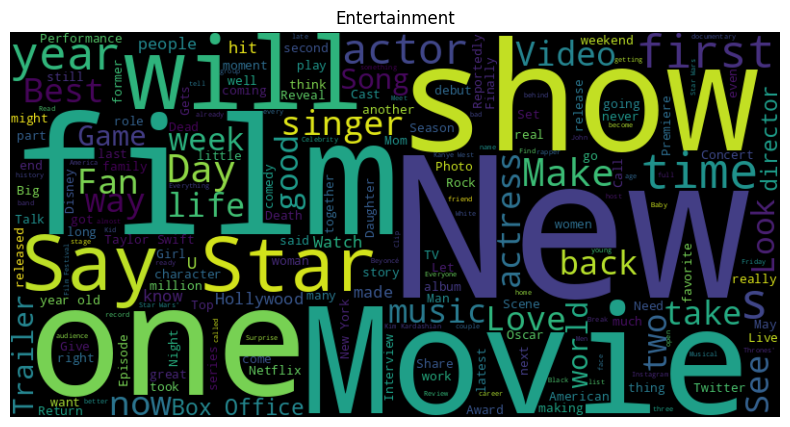

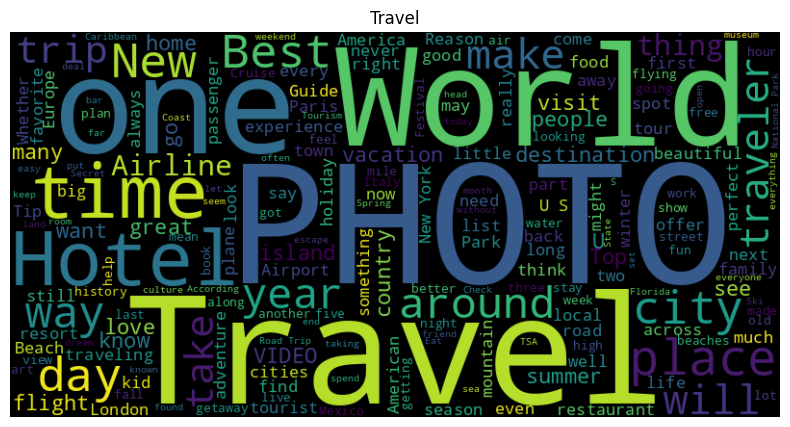

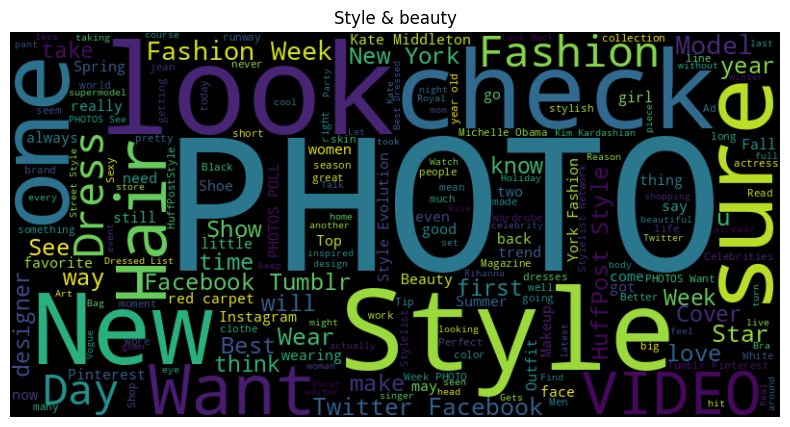

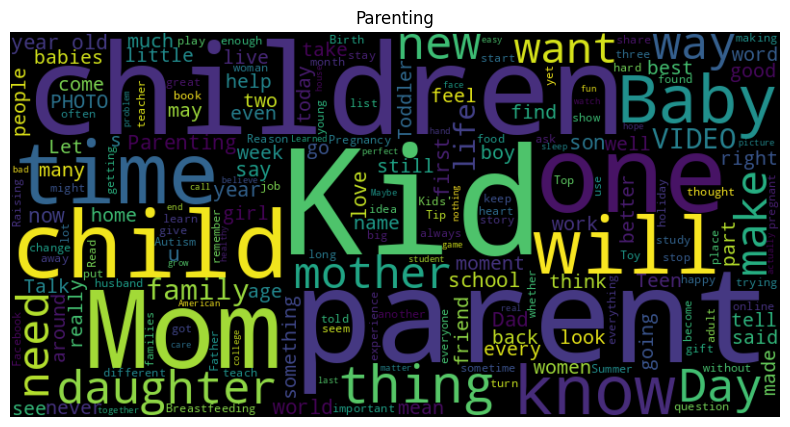

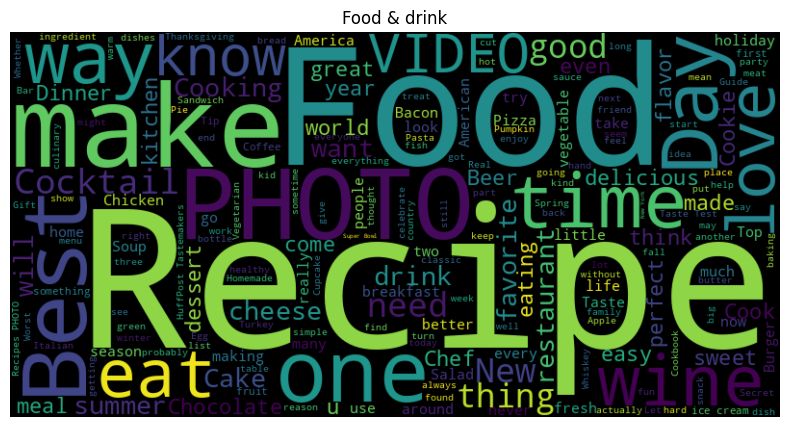

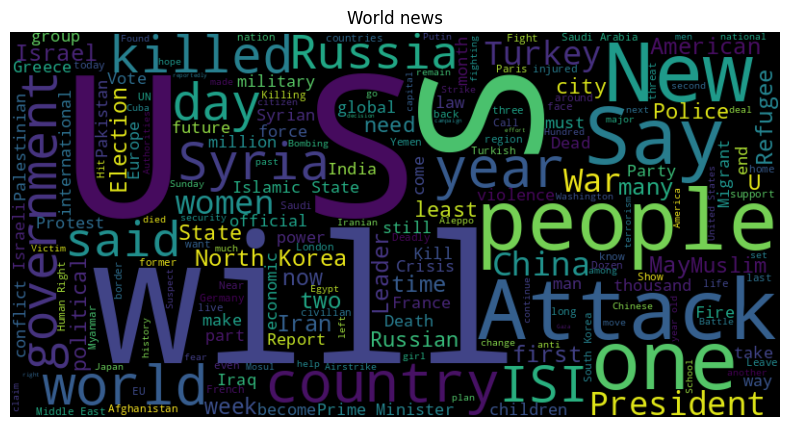

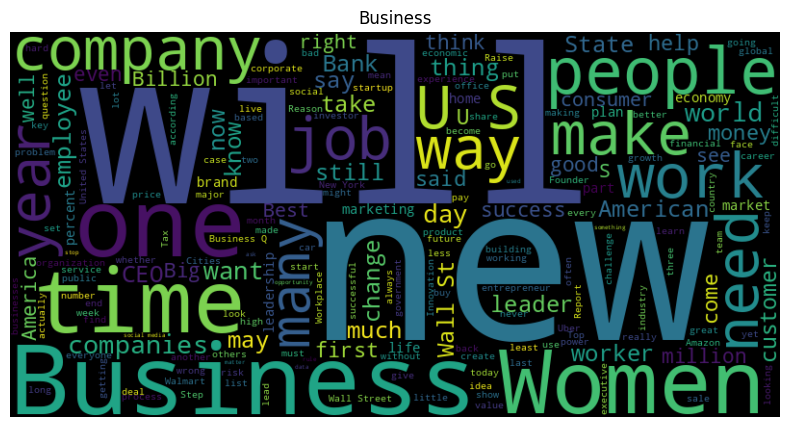

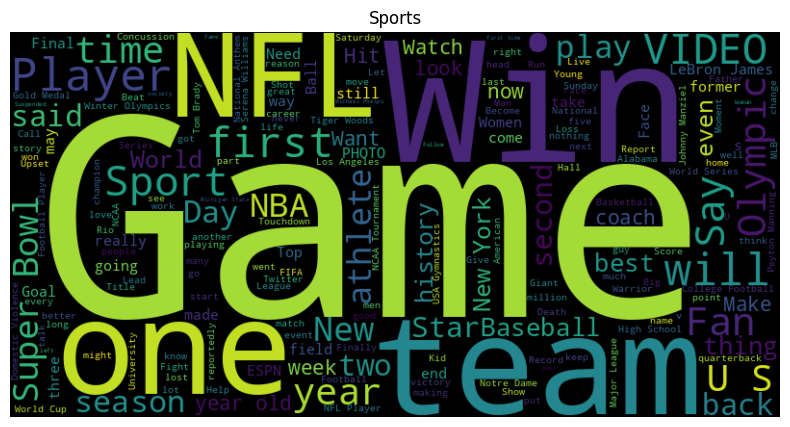

In [14]:
cate_type = df['category'].unique()

for col in cate_type:
  combine_text = ' '.join(df[df['category']==col]['text'])
  wc = WordCloud(width=800,height=400,background_color='black').generate(combine_text)
  plt.figure(figsize=(10,5))
  plt.imshow(wc,interpolation='bilinear')
  plt.axis('off')
  plt.title(f'{col.capitalize()}')
  plt.show()

#### Preprocessing Text variable

In [17]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
  text=contractions.fix(text)
  text=text.lower()
  text=re.sub(r'[^a-z\s]',"",text)
  tokens = word_tokenize(text)
  tokens = [word for word in tokens if word not in stop_words]
  tokens = [lemmatizer.lemmatize(word) for word in tokens]
  return tokens

In [23]:
df['tokens'] = df['text'].apply(preprocess)
df['tokens'][2]

['crenezumab',
 'trial',
 'gauge',
 'whether',
 'alzheimers',
 'drug',
 'prevent',
 'slow',
 'disease',
 'clock',
 'ticking',
 'united',
 'state',
 'find',
 'cure',
 'team',
 'working',
 'study',
 'dr',
 'francisco',
 'lopera']

#### TF-IDF

In [24]:
df['clean_text'] = df['tokens'].apply(lambda x:' '.join(x))
df['clean_text'][2]

'crenezumab trial gauge whether alzheimers drug prevent slow disease clock ticking united state find cure team working study dr francisco lopera'

In [25]:
tf_idf = TfidfVectorizer()
x_tfidf = tf_idf.fit_transform(df['clean_text'])
print("TF-IDF Shape:",x_tfidf.shape)
print(x_tfidf[:5].toarray())

TF-IDF Shape: (50000, 50883)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [26]:
print("Features Names Words:")
print(tf_idf.get_feature_names_out())

Features Names Words:
['aa' 'aaa' 'aafa' ... 'zyola' 'zywicki' 'zzzs']


#### Word2Vec

In [27]:
sentences = df['tokens'].tolist()
# Train Word2Vec model
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2)
# Check vector for a word
print(w2v_model.wv['good'])
# Find similar words
print(w2v_model.wv.most_similar('good'))

[ 0.08339373 -0.98689634 -0.16435988  0.2968442   1.1154529  -0.14041483
 -0.17679982  0.52899235 -0.20755897 -0.3264027   0.5575844  -0.18644978
 -0.60963666 -0.6507891   0.07575931  0.7346398   0.16048847  0.27604932
  0.09350382 -2.4535801   0.3411896  -0.64428806 -0.05813596 -0.8656482
 -0.6967782   0.28240144 -0.57577807 -1.0335708   0.36861512 -0.79589415
  0.1895915  -0.08876188  0.5023513  -0.61290336 -0.2998079   0.67116123
 -0.40460703 -0.29091614  0.38321188 -1.6367599   0.80418015 -0.74464226
  0.7904553  -0.03418148  0.9272271  -1.4436384  -1.2698171  -1.8884509
  2.3061373  -0.06327172 -0.5038948  -1.0679262  -0.14859495 -0.216643
  1.005465   -0.10522126 -0.6241477   0.04387095 -0.5069755   0.678293
 -0.21671338 -1.0945238   1.0858675   0.8408334  -0.5933455   1.6005852
  0.93512315  0.34819788 -2.0093172   0.79328877 -0.04897159 -0.434364
  0.20181504  0.27774936  0.8176326  -1.1854194   1.2379673   0.08615734
 -0.2878313   0.29840848 -0.8009769   0.26416388 -0.84313935

In [28]:
# Function to get average Word2Vec vector for each document
def w2v_vector(tokens,model):
    vectors = [model.wv[w] for w in tokens if w in model.wv]
    if len(vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

In [29]:
df['embedding'] = df['tokens'].apply(lambda x:w2v_vector(x,w2v_model))

In [30]:
df['embedding'][1]

array([-0.02543662, -0.00763479, -0.07752898,  0.12532325,  0.31955227,
       -0.52218044,  0.24744101,  0.50320196,  0.22046839, -0.48103625,
       -0.07074245, -0.4423078 , -0.25006005, -0.49471664,  0.29888728,
        0.31381524,  0.02500223, -0.41230494,  0.03828227, -1.0876498 ,
        0.04869787,  0.03563343,  0.29078496, -0.14613624, -0.2963186 ,
        0.17900662, -0.6214595 , -0.19855633, -0.01368595, -0.30872846,
        0.08874469, -0.19547737,  0.11178782, -0.31391904, -0.40079474,
        0.29614934,  0.0168646 , -0.26992676, -0.34292027, -0.93410194,
       -0.2310647 , -0.23899473,  0.09033025,  0.13670512,  0.3854052 ,
       -0.9331215 , -1.0552573 , -0.6513408 ,  0.5816516 ,  0.20789184,
       -0.08169445, -0.5538643 , -0.13857588, -0.27367407,  0.02965442,
       -0.35692975,  0.24330406, -0.05863588, -0.06802717,  0.5610927 ,
       -0.21496464, -0.44641986,  0.4217913 ,  0.6292798 , -0.2407555 ,
        0.85219413,  0.4241428 ,  0.06973156, -1.1493134 ,  0.43

In [31]:
# encode categorical variable
le = LabelEncoder()
df['category_label'] = le.fit_transform(df['category'])
label_map = dict(zip(le.classes_,le.transform(le.classes_)))
label_map

{'BUSINESS': 0,
 'ENTERTAINMENT': 1,
 'FOOD & DRINK': 2,
 'PARENTING': 3,
 'POLITICS': 4,
 'SPORTS': 5,
 'STYLE & BEAUTY': 6,
 'TRAVEL': 7,
 'WELLNESS': 8,
 'WORLD NEWS': 9}

In [32]:
x = np.vstack(df['embedding'].values)
y = df['category_label']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [33]:
print("Training set Size:", x_train.shape)
print("Testing Set Size:", x_test.shape)

Training set Size: (40000, 100)
Testing Set Size: (10000, 100)


In [37]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVC": SVC(kernel='linear')
}

In [38]:
def evaluate_models(models,x,y,x_train,x_test,y_train,y_test):
    for name, model in models.items():
        cv_scores = cross_val_score(model, x, y, cv=5)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test)
        acc = accuracy_score(y_test,y_pred)

        print("="*60)
        print(f"{model.__class__.__name__}")
        print(f"Cross-Val Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
        print(f"Accuracy: {acc:.4f}")
        print("Classification Report:")
        print(classification_report(y_test,y_pred))

In [39]:
evaluate_models(models,x,y,x_train,x_test,y_train,y_test)

LogisticRegression
Cross-Val Accuracy: 0.5568 (+/- 0.0032)
Accuracy: 0.5644
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.47      0.46       955
           1       0.46      0.50      0.48       985
           2       0.66      0.62      0.64      1021
           3       0.60      0.60      0.60      1030
           4       0.63      0.53      0.57      1034
           5       0.55      0.54      0.55       995
           6       0.69      0.65      0.67       986
           7       0.55      0.52      0.53      1008
           8       0.52      0.56      0.54      1009
           9       0.55      0.64      0.60       977

    accuracy                           0.56     10000
   macro avg       0.57      0.56      0.56     10000
weighted avg       0.57      0.56      0.57     10000

SVC
Cross-Val Accuracy: 0.5589 (+/- 0.0044)
Accuracy: 0.5662
Classification Report:
              precision    recall  f1-score   support

   

- Both models perform similarly.

#### Predicting New News Articles

In [40]:
new_articles = [
    "The government passed a new education policy",
    "The football team won the championship",
    "A new smartphone with AI features was launched"
]

In [46]:
# preprocees article
new_tokens = [preprocess(a) for a in new_articles]

# convert new tokens into Word2Vec embeddings
new_vector = np.array([w2v_vector(tokens, w2v_model) for tokens in new_tokens])

pre = models["Logistic Regression"].predict(new_vector)

# Convert numbers back to category names
predict_label = le.inverse_transform(pre)

In [47]:
for article, label in zip(new_articles,predict_label):
  print(f"Article: {article}\nPredicted Category: {label}\n")

Article: The government passed a new education policy
Predicted Category: BUSINESS

Article: The football team won the championship
Predicted Category: SPORTS

Article: A new smartphone with AI features was launched
Predicted Category: ENTERTAINMENT

